<center><h1> Gender and Age Prediction using CNN </h1></center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls drive/MyDrive

'Colab Notebooks'   Folder   Resume   Temp   UTKFace.zip


In [3]:
#!unzip drive/MyDrive/UTKFace.zip

## Import Libraries

In [4]:
import os

In [5]:
import cv2

In [6]:
import numpy as np
import pandas as pd

In [7]:
from PIL import Image 

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
import tensorflow as tf

In [10]:
from tensorflow.keras.models import Sequential ,Model

In [11]:
from tensorflow.keras.layers import Input

In [12]:
from tensorflow.keras.layers import Conv2D

In [13]:
# used for reduce data dimensionality
from tensorflow.keras.layers import MaxPooling2D

In [14]:
from tensorflow.keras.layers import Dropout

In [15]:
# number of units proportional to input
from tensorflow.keras.layers import Flatten

In [16]:
#regular dense connected layer
from tensorflow.keras.layers import Dense

In [17]:
from tensorflow.keras.layers import Activation

In [18]:
from tensorflow.keras.optimizers import Adam

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

In [20]:
import warnings
warnings.filterwarnings("ignore")

## Data Preprocessing

In [21]:
face_folder = "./UTKFace"

In [22]:
files = os.listdir(face_folder)

In [23]:
files

['37_0_2_20170117140013545.jpg.chip.jpg',
 '10_0_0_20170110220255346.jpg.chip.jpg',
 '32_1_1_20170113000027033.jpg.chip.jpg',
 '1_1_0_20170109192737181.jpg.chip.jpg',
 '1_0_2_20161219204634589.jpg.chip.jpg',
 '35_0_1_20170113134305216.jpg.chip.jpg',
 '18_1_0_20170109214042490.jpg.chip.jpg',
 '43_0_2_20170117140033069.jpg.chip.jpg',
 '30_1_1_20170115235628191.jpg.chip.jpg',
 '26_1_2_20170105164540403.jpg.chip.jpg',
 '70_0_0_20170111205335191.jpg.chip.jpg',
 '58_0_0_20170113190658809.jpg.chip.jpg',
 '59_0_0_20170109012750162.jpg.chip.jpg',
 '25_1_3_20170104222315121.jpg.chip.jpg',
 '65_0_1_20170113174447314.jpg.chip.jpg',
 '54_0_1_20170113185017352.jpg.chip.jpg',
 '75_1_2_20170110182818569.jpg.chip.jpg',
 '60_0_0_20170117162852563.jpg.chip.jpg',
 '59_0_4_20170109012655318.jpg.chip.jpg',
 '77_1_0_20170110180511080.jpg.chip.jpg',
 '30_1_2_20170116162634192.jpg.chip.jpg',
 '32_1_0_20170117001041422.jpg.chip.jpg',
 '8_1_0_20170109204910999.jpg.chip.jpg',
 '39_0_0_20170116214253075.jpg.chip.j

Name of Images : age_gender_

gender : 0 male , 1 female

In [24]:
ages    = []
genders = []
images  = []

In [25]:
for face in files :
    
    age    = int(face.split('_')[0])
    gender = int(face.split('_')[1])
    
    path  = face_folder + '/' + face
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    
    
    ages.append(age)
    genders.append(gender)
    images.append(image)

In [26]:
G = ['Male' ,'Female']

70
Male


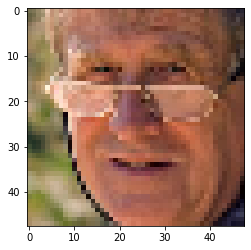

In [27]:
print(ages[10])
print(G[genders[10]])
plt.imshow(images[10])

50
Male


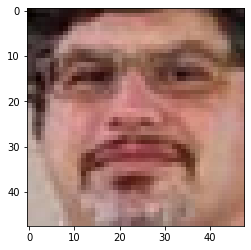

In [28]:
print(ages[24])
print(G[genders[24]])
plt.imshow(images[24])

In [29]:
images_arr  = np.array(images)
genders_arr = np.array(genders)
ages_arr    = np.array(ages)

## Data Visualization

- `Gender`

In [30]:
np.unique(genders_arr)

array([0, 1])

In [31]:
values, counts = np.unique(genders_arr, return_counts=True)

In [32]:
print(counts)

[12391 11317]


In [33]:
gender = ['Male', 'Female']

<BarContainer object of 2 artists>

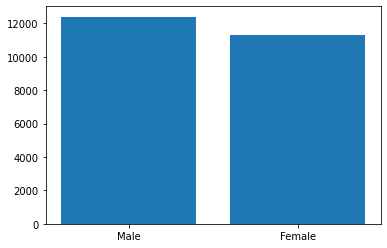

In [34]:
plt.bar(gender,counts)

- `Ages`

In [35]:
values, counts = np.unique(ages_arr, return_counts=True)

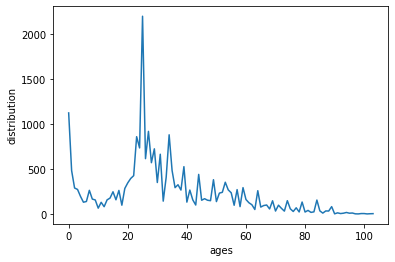

In [36]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

## X and Y

In [37]:
# X ----> images_arr
# Y ----> genders_arr and ages_arr

In [38]:
X = images_arr/255
X

array([[[[0.25882353, 0.30588235, 0.1372549 ],
         [0.07843137, 0.11764706, 0.        ],
         [0.09803922, 0.12941176, 0.04705882],
         ...,
         [0.45490196, 0.36078431, 0.31372549],
         [0.30980392, 0.22352941, 0.21568627],
         [0.21960784, 0.15686275, 0.17647059]],

        [[0.24705882, 0.28235294, 0.12156863],
         [0.09803922, 0.1254902 , 0.00392157],
         [0.13333333, 0.15294118, 0.08235294],
         ...,
         [0.42745098, 0.32156863, 0.28627451],
         [0.27058824, 0.19215686, 0.18431373],
         [0.19215686, 0.1372549 , 0.15294118]],

        [[0.19607843, 0.21960784, 0.0745098 ],
         [0.10588235, 0.1254902 , 0.01568627],
         [0.1372549 , 0.14509804, 0.09019608],
         ...,
         [0.37647059, 0.25882353, 0.24313725],
         [0.24705882, 0.17647059, 0.16470588],
         [0.20392157, 0.15686275, 0.17254902]],

        ...,

        [[0.58823529, 0.4627451 , 0.40392157],
         [0.56078431, 0.43921569, 0.36470588]

In [39]:
labels = []

for i in range(len(ages)) :
    
    label = []
    
    label.append([ages[i]])
    label.append([genders[i]])
  
    labels.append(label)

In [40]:
y = np.array(labels)
y

array([[[37],
        [ 0]],

       [[10],
        [ 0]],

       [[32],
        [ 1]],

       ...,

       [[ 1],
        [ 0]],

       [[23],
        [ 1]],

       [[45],
        [ 0]]])

## Split Data 

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.25 ,random_state=45)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17781, 48, 48, 3)
(5927, 48, 48, 3)
(17781, 2, 1)
(5927, 2, 1)


In [43]:
#             gender     ,     age
y_train = [ y_train[:,1] , y_train[:,0] ]
y_test  = [ y_test[:,1]  , y_test[:,0]  ]

## Model

In [44]:
input_shape = X_train.shape[1:]

In [45]:
inputs = Input((input_shape))

In [46]:
convolutional_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxpooling_1    = MaxPooling2D(pool_size=(2, 2))                    (convolutional_1)

convolutional_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxpooling_1)
maxpooling_2    = MaxPooling2D(pool_size=(2, 2))                    (convolutional_2)

convolutional_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxpooling_2)
maxpooling_3    = MaxPooling2D(pool_size=(2, 2))                     (convolutional_3)

convolutional_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxpooling_3)
maxpooling_4    = MaxPooling2D(pool_size=(2, 2))                     (convolutional_4)

In [47]:
flatten = Flatten() (maxpooling_4)

In [48]:
# fully connected layers

dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

In [49]:
dropout_1 = Dropout(0.3) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

In [50]:
output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)

In [51]:
model = Model(inputs=[inputs], outputs=[output_1, output_2])

In [52]:
# binary_crossentropy for gender (classification) , 
# mae for age (regression)

model.compile(loss=['binary_crossentropy', 'mae'], optimizer='adam', metrics=['accuracy'])

In [53]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 46, 46, 32)   896         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 23, 23, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 21, 21, 64)   18496       ['max_pooling2d[0][0]']          
                                                                                              

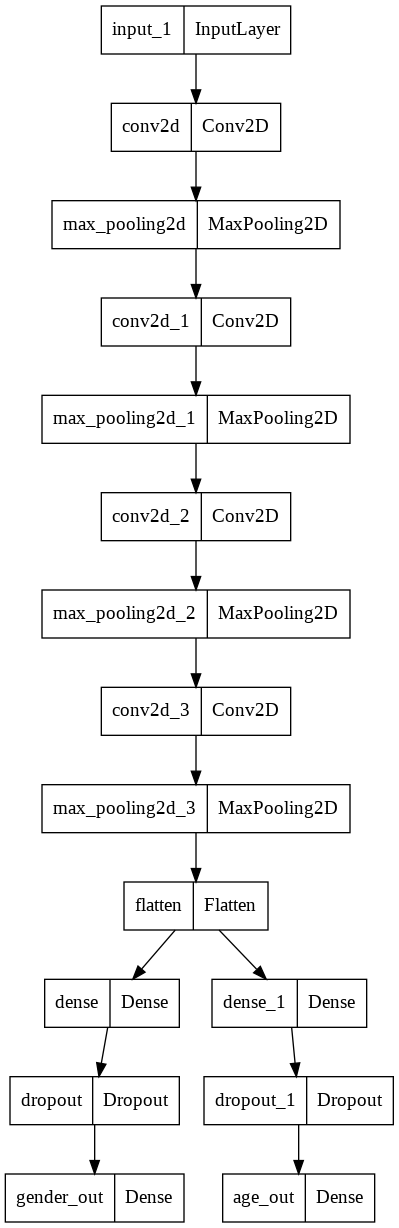

In [54]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [55]:
model_history = model.fit(
                           X_train , 
                           y_train , 
                           validation_data = (X_test,y_test) ,
                           batch_size = 64 , 
                           epochs     = 30 ,
                           shuffle    = True                           
                        ) 

Epoch 1/30
278/278 [==============================] - 81s 286ms/step - loss: 16.6299 - gender_out_loss: 0.7160 - age_out_loss: 15.9138 - gender_out_accuracy: 0.5091 - age_out_accuracy: 0.0455 - val_loss: 14.6581 - val_gender_out_loss: 0.6862 - val_age_out_loss: 13.9719 - val_gender_out_accuracy: 0.5234 - val_age_out_accuracy: 0.0526
Epoch 2/30
278/278 [==============================] - 76s 275ms/step - loss: 14.2723 - gender_out_loss: 0.6552 - age_out_loss: 13.6171 - gender_out_accuracy: 0.5968 - age_out_accuracy: 0.0456 - val_loss: 13.0950 - val_gender_out_loss: 0.5875 - val_age_out_loss: 12.5075 - val_gender_out_accuracy: 0.6891 - val_age_out_accuracy: 0.0526
Epoch 3/30
278/278 [==============================] - 79s 285ms/step - loss: 12.6090 - gender_out_loss: 0.5430 - age_out_loss: 12.0660 - gender_out_accuracy: 0.7303 - age_out_accuracy: 0.0390 - val_loss: 11.4125 - val_gender_out_loss: 0.5219 - val_age_out_loss: 10.8906 - val_gender_out_accuracy: 0.7402 - val_age_out_accuracy: 0.

## Evaluation

In [56]:
model.evaluate(X_test,y_test)

186/186 [==============================] - 6s 32ms/step - loss: 7.0503 - gender_out_loss: 0.3049 - age_out_loss: 6.7454 - gender_out_accuracy: 0.8708 - age_out_accuracy: 0.0113


[7.050281047821045,
 0.304857462644577,
 6.745419979095459,
 0.8707609176635742,
 0.011304201558232307]

Text(0.5, 1.0, 'Model Loss')

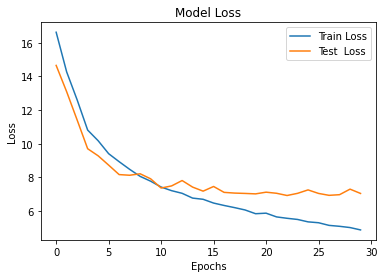

In [57]:
## Model Loss

train_loss = model_history.history['loss']
val_loss   = model_history.history['val_loss']

plt.plot(train_loss ,label='Train Loss')
plt.plot(val_loss   ,label='Test  Loss')

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()

plt.title("Model Loss")

Text(0.5, 1.0, 'Model Loss')

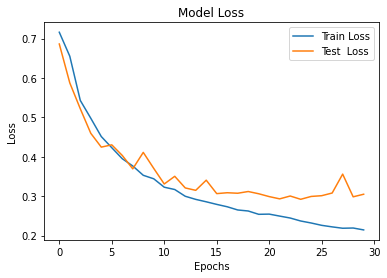

In [58]:
## Gender

train_loss = model_history.history['gender_out_loss']
val_loss   = model_history.history['val_gender_out_loss']

plt.plot(train_loss ,label='Train Loss')
plt.plot(val_loss   ,label='Test  Loss')

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()

plt.title("Model Loss")

Text(0.5, 1.0, 'Model Accuracy')

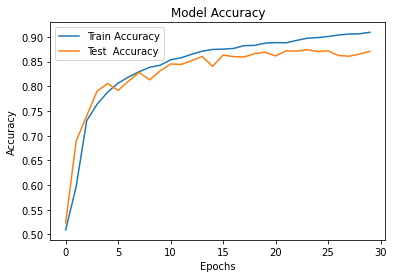

In [59]:
train_acc = model_history.history['gender_out_accuracy']
val_acc   = model_history.history['val_gender_out_accuracy']

plt.plot(train_acc ,label='Train Accuracy')
plt.plot(val_acc   ,label='Test  Accuracy')

plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()

plt.title("Model Accuracy")

In [61]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Actual vs Predicted Age')

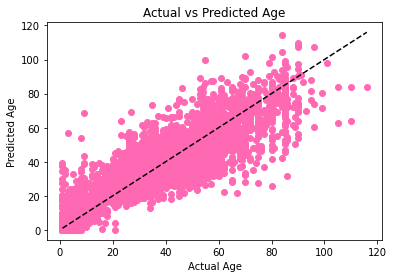

In [62]:
## Age

mini = y_test[1].min()
maxi = y_test[1].max()

plt.scatter(y_test[1] ,y_pred[1] ,color = 'hotpink')
plt.plot([mini,maxi],[mini,maxi],'k--',color='black')

plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")

plt.title("Actual vs Predicted Age")

In [63]:
gend_y_pred = np.round(y_pred[0])

In [64]:
report = classification_report(y_test[0],gend_y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      3102
           1       0.88      0.84      0.86      2825

    accuracy                           0.87      5927
   macro avg       0.87      0.87      0.87      5927
weighted avg       0.87      0.87      0.87      5927



In [65]:
confusion_matrix(y_test[0],gend_y_pred)

array([[2775,  327],
       [ 439, 2386]])

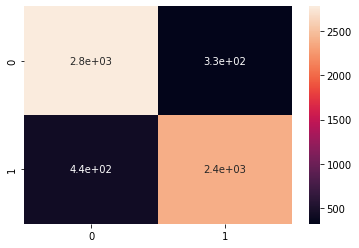

In [66]:
cm = confusion_matrix(y_test[0],gend_y_pred)
sns.heatmap(cm, annot=True)

## Prediction

In [67]:
# images_arr  ---> original Image
# images_arr_2 ---> /255

gender = ['Male' ,'Female']

def modelPredection1(index):
    
    plt.imshow(images_arr[index])
    
    img_test = X[index]
    img_test = np.array([img_test])
    
    pred = model.predict(img_test)
    
    gen = int(np.round(pred[0][0]))
    age = int(np.round(pred[1][0]))
    
    print("Predicted Age: "+ str(age))
    print("Predicted Sex: "+ gender[gen])

Predicted Age: 40
Predicted Sex: Male


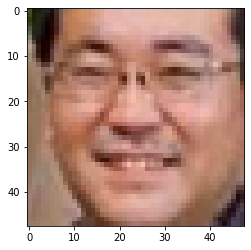

In [68]:
modelPredection1(0)

Predicted Age: 13
Predicted Sex: Female


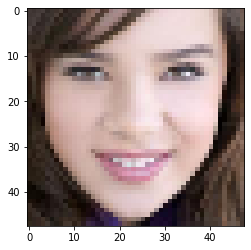

In [69]:
modelPredection1(6)

Predicted Age: 41
Predicted Sex: Male


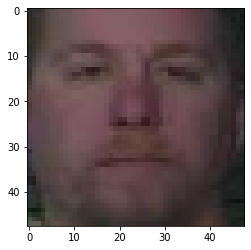

In [70]:
modelPredection1(23)

Predicted Age: 82
Predicted Sex: Male


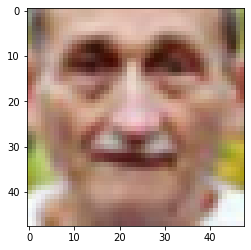

In [71]:
modelPredection1(137)

In [72]:
gender = ['Male' ,'Female']

def modelPredection2(path):
    
    img = Image.open(path)
    plt.imshow(img);
    
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(48,48))
    
    image  = np.array(image)
    image  = image/255
    img_test = np.array([image])
    
    pred = model.predict(img_test)
    
    gen = int(np.round(pred[0][0]))
    age = int(np.round(pred[1][0]))
    
    print("Predicted Age: "+ str(age))
    print("Predicted Sex: "+ gender[gen])

Predicted Age: 47
Predicted Sex: Male


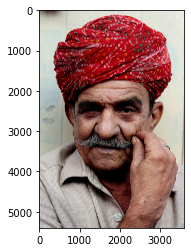

In [74]:
modelPredection2('man.jpg')

Predicted Age: 30
Predicted Sex: Female


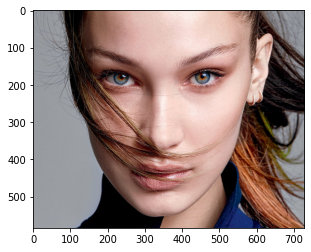

In [75]:
modelPredection2('bella.jpg')

Predicted Age: 33
Predicted Sex: Male


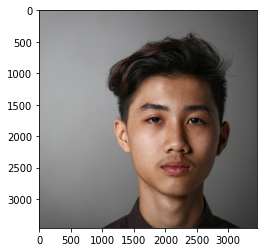

In [76]:
modelPredection2('boy.jpg')

Predicted Age: 41
Predicted Sex: Female


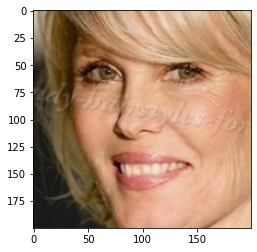

In [78]:
modelPredection2('65_1_0_20170110143236073.jpg')

Predicted Age: 68
Predicted Sex: Male


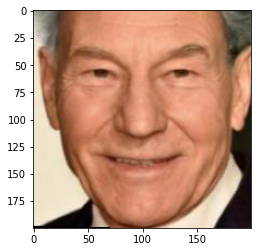

In [79]:
modelPredection2('67_0_0_20170104023306558.jpg')

Predicted Age: 102
Predicted Sex: Female


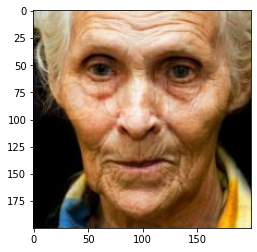

In [80]:
modelPredection2('96_1_0_20170110172637082.jpg')